# Notebook objective
Explore the Home Credit Default Risk Kaggle dataset to understand the required data cleaning steps to predict defaulting customers.

https://www.kaggle.com/c/home-credit-default-risk/data

# Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from zipfile import ZipFile

In [2]:
%load_ext pycodestyle_magic
%flake8_on
%matplotlib inline

In [3]:
# Create a function which can create a histogram, split by a variable
def plot_histogram_dv(x, y):
    plt.hist(list(x[y == 0]), alpha=0.5, label='DV=0')
    plt.hist(list(x[y == 1]), alpha=0.5, label='DV=1')
    plt.title("Histogram of '{var_name}' by DV category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.xticks(rotation='vertical')
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

5:80: E501 line too long (81 > 79 characters)


### Create folder structure

In [4]:
# Make root folder the current working directory
os.chdir('..')

In [5]:
input_folder = './data/raw/'

In [6]:
output_folder = './reports/figures/'

## Data description

### application_{train|test}.csv
- This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
- Static data for all applications. One row represents one loan in our data sample.

### bureau.csv
- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

### bureau_balance.csv
- Monthly balances of previous credits in Credit Bureau.
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

### POS_CASH_balance.csv
- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

### credit_card_balance.csv
- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

### previous_application.csv
- All previous applications for Home Credit loans of clients who have loans in our sample.
- There is one row for each previous application related to loans in our data sample.

### installments_payments.csv
- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

### HomeCredit_columns_description.csv
- This file contains descriptions for the columns in the various data files.

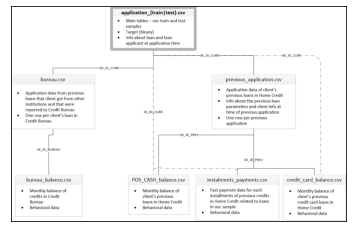

2:80: E501 line too long (93 > 79 characters)


In [7]:
import matplotlib.image
link = 'https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png'
read_img = matplotlib.image.imread(link)
plt.xticks([]), plt.yticks([])
plt.imshow(read_img)

## Import data

In [8]:
zip_file = ZipFile(input_folder+'home-credit-default-risk.zip')
application_train_df = pd.read_csv(zip_file.open('application_train.csv'))

# Data exploration

## Column selection

In [9]:
# Select columns which can be used by financially excluded
column_selection = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE',
                    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                    'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                    'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
                    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                    'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
                    'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                    'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
                    'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                    'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
                    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                    'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                    'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
                    'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
                    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
                    'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
                    'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
                    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
                    'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
                    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
                    'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                    'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
                    'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                    'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
                    'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
                    'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
                    'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
                    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
                    'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
                    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
                    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
                    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
                    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                    'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
                    'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
                    'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                    'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                    'FLAG_DOCUMENT_21', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                    'AMT_ANNUITY', 'AMT_GOODS_PRICE']

application_train_df = application_train_df[column_selection]

12:80: E501 line too long (80 > 79 characters)
14:80: E501 line too long (80 > 79 characters)


In [10]:
# Add column for calculations
application_train_df['SUM'] = 1

In [11]:
application_train_df['AMT_ANNUITY'].head(2)

0    24700.5
1    35698.5
Name: AMT_ANNUITY, dtype: float64

In [12]:
application_train_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,SUM
0,100002,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,1
1,100003,0,Cash loans,F,N,N,0,Family,State servant,Higher education,...,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1


In [13]:
# Count the number of columns available
len(application_train_df.columns)

114

In [14]:
application_train_df.shape

(307511, 114)

## application_train_df

### Missing data

In [15]:
test_df = application_train_df.copy()

In [ ]:
# Visualise missing data
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The heatmap shows that quite some features have missing data. Next we'll be looking for columns with a lot of missing data

In [140]:
# Calculate the missing data % in training data
missing_data = test_df.isna().sum() / test_df.isna().count() * 100
missing_data[missing_data >0].sort_values(ascending=False)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
NONLIVINGAREA_MEDI              55

3:28: E225 missing whitespace around operator


In [18]:
# Remove features with more than 50% missing data
missing_data[missing_data > 50].count()

features_40p_missing = list(missing_data[missing_data > 50].keys())
print('The following features have been dropped:', features_40p_missing)

test_df.drop(columns=features_40p_missing, inplace=True)
test_df = application_train_df.copy()

The following features have been dropped: ['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [20]:
# Count the number of remaining features
len(test_df.columns)

114

In [21]:
# List available categorical values
list(test_df.select_dtypes(include=['object']))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [22]:
# List available continous variables
list(test_df.select_dtypes(include=['float64']))

['REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 

In [23]:
test_df.columns[test_df.isna().any()].tolist()

['NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMON

<AxesSubplot:>

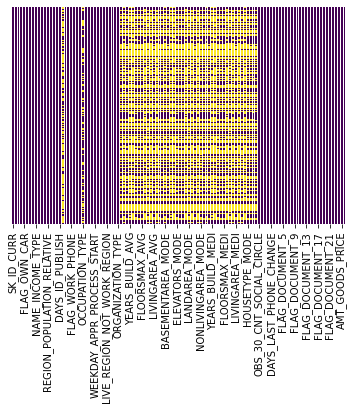

In [24]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Findings:
- To prevent overfitting, we'll remove features  with more than 40% missing data

In [25]:
application_train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,SUM
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.0
mean,278180.518577,0.080729,0.417052,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,...,0.000267,0.008130,0.000595,0.000507,0.000335,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,1.0
std,102790.175348,0.272419,0.722121,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,...,0.016327,0.089798,0.024387,0.022518,0.018299,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.0
min,100002.000000,0.000000,0.000000,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,1.0
25%,189145.500000,0.000000,0.000000,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,1.0
50%,278202.000000,0.000000,0.000000,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,1.0
75%,367142.500000,0.000000,1.000000,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,1.0
max,456255.000000,1.000000,19.000000,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,1.0


Because there are quite a number of datapoints, next we'll be reviewing the remaining data per data type:
- Categorical
- Continous
- Ordinal

In [26]:
application_train_df.shape

(307511, 114)

### Dependent variable

In [27]:
application_train_df['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [28]:
# Calculate the % of missing data
variable = 'TARGET'
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

Findings:
- ~8% of customers have payment difficulties. THis means that the dataset is highly unbalanced, which will affect the algorithms that can be applied or requires the dataset to be artificially balanced
- No missing data

### Check for duplicate customers

In [29]:
dup_check = application_train_df.duplicated(subset='SK_ID_CURR', keep=False)
application_train_df[dup_check]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,SUM


Findings:
- No duplicate customer entries in application dataset

In [30]:
application_train_df.shape

(307511, 114)

## Categorical variables

In [31]:
# List available categorical values
list(application_train_df.select_dtypes(include=['object']))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

**Feature:  NAME_CONTRACT_TYPE**

In [32]:
variable = 'NAME_CONTRACT_TYPE'

In [33]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [34]:
# Look at available contract types
application_train_df[variable].value_counts(normalize=True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

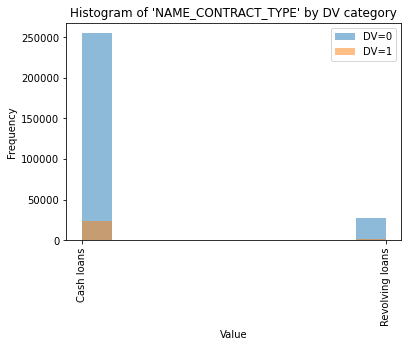

In [35]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [36]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64

Findings:
- No missing data
- ~90% of customers applied for a cash loan
- Customers with a cash loan are more likely to experience payment difficulties than customers with revolving loans

**Feature: CODE_GENDER**

In [37]:
test_df = application_train_df.copy()

In [38]:
variable = 'CODE_GENDER'

In [39]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [40]:
# Look at available contract types
application_train_df[variable].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

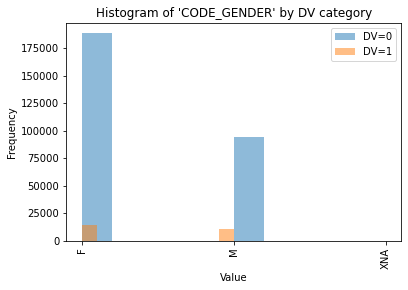

In [41]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [42]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

CODE_GENDER
F      0.069993
M      0.101419
XNA    0.000000
Name: TARGET, dtype: float64

In [43]:
# Replace 'XNA' with the most frequent occuring gender response
freq = test_df['CODE_GENDER'].value_counts().index.tolist()[0]
test_df['CODE_GENDER'].replace('XNA', freq, inplace=False)

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object

Findings
- No missing data
- ~65% of customers are female
- Men are  more likely to experience payment difficulties
- Only 0.000013 of customers didn't provide their gender ('XNA') so it may be good to recode this to the most frequently occuring one ('F')

**Feature:  FLAG_OWN_CAR**

In [44]:
variable = 'FLAG_OWN_CAR'

In [45]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [46]:
# Look at available contract types
application_train_df[variable].value_counts(normalize=True)

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

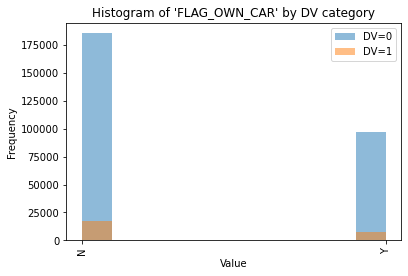

In [47]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [48]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

FLAG_OWN_CAR
N    0.085002
Y    0.072437
Name: TARGET, dtype: float64

Findings:
- No missing data
- ~65% of customers doesn't own a car
- Customers without a car are slightly more likely to experience payment difficulties

**Feature: FLAG_OWN_REALTY**

In [49]:
variable = 'FLAG_OWN_REALTY'

In [50]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [51]:
# Look at available contract types
application_train_df[variable].value_counts(normalize=True)

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

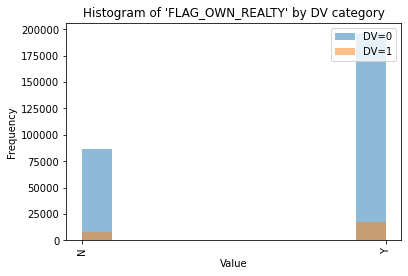

In [52]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [53]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

FLAG_OWN_REALTY
N    0.083249
Y    0.079616
Name: TARGET, dtype: float64

Findings:
- No missing data
- ~69% of customers owns their own property
- Customers without an own house are slightly more likely to experience payment difficulties, but the difference is minimal

**Feature:   NAME_TYPE_SUITE**

In [54]:
variable = 'NAME_TYPE_SUITE'

In [55]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.42014757195677555

In [56]:
# Look at availabletypes
application_train_df[variable].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
NaN                0.004201
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

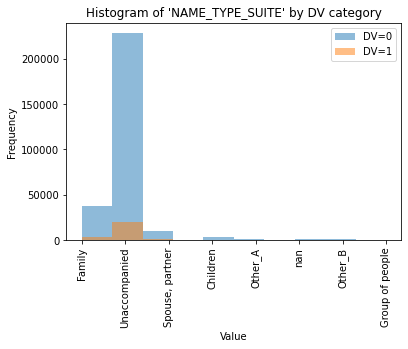

In [57]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [58]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

NAME_TYPE_SUITE
Children           0.073768
Family             0.074946
Group of people    0.084871
Other_A            0.087760
Other_B            0.098305
Spouse, partner    0.078716
Unaccompanied      0.081830
Name: TARGET, dtype: float64

Findings:
- The majority (~81%) of customers applied unaccompanied for a loan
- Categories of less than <1% should be removed to prevent overfitting (Group of people, other_a, other_b)
- Between unaccompaniedapplicants and family (majority of customers), unaccompanied customers are almost 1% more likely to have payment issues

**Feature: NAME_INCOME_TYPE**

In [59]:
variable = 'NAME_INCOME_TYPE'

In [60]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [61]:
# Look at availabletypes
application_train_df[variable].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

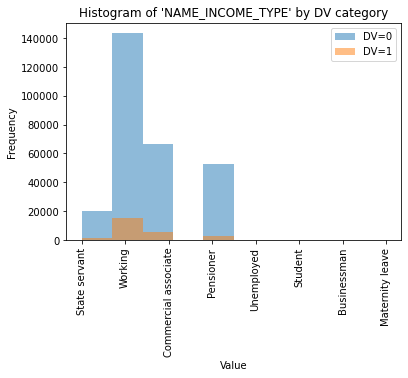

In [62]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [63]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64

Findings:
- No missing data
- The majority of customers either receive income from work, commercial associate or pensioner
- Of those categories, workers are most likely to experience payment difficculties, followed by commercial associates

**Feature:   NAME_EDUCATION_TYPE**

In [64]:
variable = 'NAME_EDUCATION_TYPE'

In [65]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [66]:
# Look at availabletypes
application_train_df[variable].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

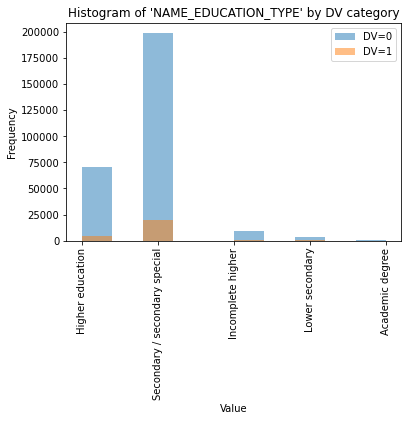

In [67]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [68]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084850
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Name: TARGET, dtype: float64

Conclusion
- No missing data
- Most customers highest degree is  secondary education (71%), followed by higher education (24%)
- Of those two categories, customers with higher education are less likely to experience payment difficulties (5.3% vs 8.9%) 

**Feature: NAME_FAMILY_STATUS**

In [69]:
variable = 'NAME_FAMILY_STATUS'

In [70]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [71]:
# Look at availabletypes
application_train_df[variable].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

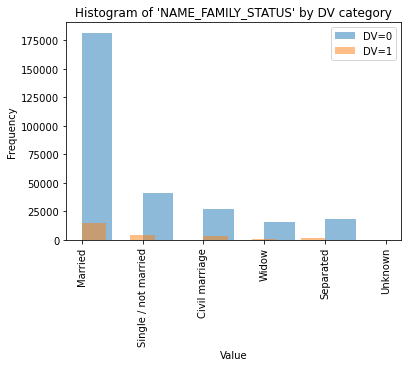

In [72]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [73]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

NAME_FAMILY_STATUS
Civil marriage          0.099446
Married                 0.075599
Separated               0.081942
Single / not married    0.098077
Unknown                 0.000000
Widow                   0.058242
Name: TARGET, dtype: float64

Findings:
- No missing data
- Most customers are married (64%), followed by single (15%)
- Single customers or customers with a civil marriage are most likely to experience payment difficulties

**Feature: NAME_HOUSING_TYPE**

In [74]:
variable = 'NAME_HOUSING_TYPE'

In [75]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [76]:
# Look at availabletypes
application_train_df[variable].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

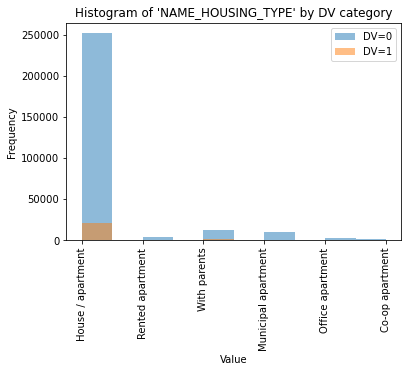

In [77]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [78]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

NAME_HOUSING_TYPE
Co-op apartment        0.079323
House / apartment      0.077957
Municipal apartment    0.085397
Office apartment       0.065724
Rented apartment       0.123131
With parents           0.116981
Name: TARGET, dtype: float64

Findings:
- No missing data
- The majority of customer live in a house or apartment (89%), followed by living with parents (5%) and municipal apartment (4%)
- Of those three groups, customers living with parents are most likely to experience payment difficulties

**Feature:  WEEKDAY_APPR_PROCESS_START**

In [79]:
variable = 'WEEKDAY_APPR_PROCESS_START'

In [80]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [81]:
# Look at availabletypes
application_train_df[variable].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

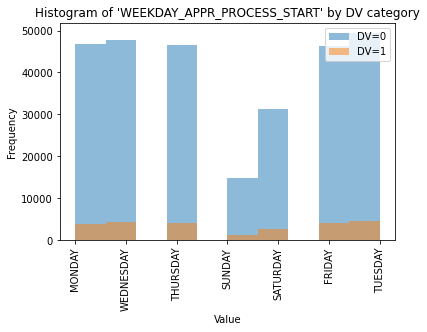

In [82]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [83]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

WEEKDAY_APPR_PROCESS_START
FRIDAY       0.081469
MONDAY       0.077572
SATURDAY     0.078873
SUNDAY       0.079291
THURSDAY     0.081003
TUESDAY      0.083505
WEDNESDAY    0.081604
Name: TARGET, dtype: float64

Findings:
- No missing data
- Previous application days of customers are fairly equally distributed during weekdays (~16%), with slightly less applications on Saturday (11%) and even some on Sunday (5%)
- There isn't much variation on payment difficulties, so this feature is unlikely to be of use when building the model

**Feature:   ORGANIZATION_TYPE**

In [84]:
variable = 'ORGANIZATION_TYPE'

In [85]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

In [86]:
# Look at availabletypes
application_train_df[variable].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

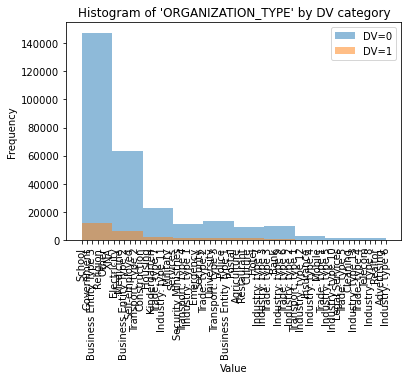

In [87]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [88]:
# Calculate the likelihood of payment difficulties per customer segment
count_groupby = application_train_df.groupby(variable)['TARGET'].sum()
total_groupby = application_train_df.groupby(variable)['TARGET'].count()
count_groupby / total_groupby

ORGANIZATION_TYPE
Advertising               0.081585
Agriculture               0.104727
Bank                      0.051855
Business Entity Type 1    0.081384
Business Entity Type 2    0.085284
Business Entity Type 3    0.092996
Cleaning                  0.111538
Construction              0.116798
Culture                   0.055409
Electricity               0.066316
Emergency                 0.071429
Government                0.069781
Hotel                     0.064182
Housing                   0.079446
Industry: type 1          0.110683
Industry: type 10         0.064220
Industry: type 11         0.086538
Industry: type 12         0.037940
Industry: type 13         0.134328
Industry: type 2          0.072052
Industry: type 3          0.106162
Industry: type 4          0.101482
Industry: type 5          0.068447
Industry: type 6          0.071429
Industry: type 7          0.080337
Industry: type 8          0.125000
Industry: type 9          0.066805
Insurance                 0.056951
Ki

Findings:
- No missing data
- Most frequent organisation where customers work: 
    - 22% Business Entity Type 3
    - 18% XNA
    - 12% Self-employed
- Less frequent types can likely be re-grouped to reduce outliers:
    - Transport = Transport: type 1+2+3
    - Trade = Transport: type 1+2+3+4+5+6+7
- Of those categories, self employed has most likely payment difficulties, followed by Business entiry Type 3
    -  9.3% Business Entity Type 3
    -  5.4% XNA
    - 10.2% Self-employed

## Continous variables

In [89]:
application_train_df.shape

(307511, 114)

In [90]:
test_df = application_train_df.copy()

In [91]:
# List available continous variables
list(application_train_df.select_dtypes(include=['float64']))

['REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 

**Feature:  AMT_INCOME_TOTAL**

In [92]:
variable = 'AMT_INCOME_TOTAL'

In [93]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

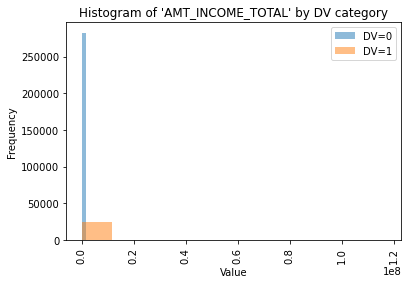

In [94]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

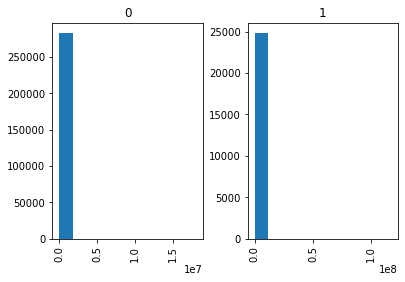

In [95]:
application_train_df[['AMT_INCOME_TOTAL', 'TARGET']].hist(column='AMT_INCOME_TOTAL', by='TARGET', bins=10)

Clearly, one or more values are frequently occuring, creating a distorted graph

In [96]:
# Identify most frequently occurring value, which appears to distort graph
test_df['AMT_INCOME_TOTAL'].value_counts().index.tolist()[0]

135000.0

In [97]:
# Count the number of customers with the most frequently occuring value
test_df[test_df['AMT_INCOME_TOTAL'] == 135000]['SK_ID_CURR'].count() / test_df['SK_ID_CURR'].count()

0.11625600385026877

In [98]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(-91324.35, 7823940.0]",307507,24824,0.080727
"(7823940.0, 15622230.0]",2,0,0.000000
"(15622230.0, 23420520.0]",1,0,0.000000
"(23420520.0, 31218810.0]",0,0,NaN
"(31218810.0, 39017100.0]",0,0,NaN
"(39017100.0, 46815390.0]",0,0,NaN
"(46815390.0, 54613680.0]",0,0,NaN
"(54613680.0, 62411970.0]",0,0,NaN
"(62411970.0, 70210260.0]",0,0,NaN


2:80: E501 line too long (82 > 79 characters)


Clearly, 135k, 112.5k, 180k were the default values, occuring for 7-11% of customers making this feature less reliable

Findings:
- No missing data
- Values 135k, 112.5k, 180k appear to be default value, as they're occuring quite frequently (7-12%)
- Outliers need to be dealt with

**Feature:   AMT_CREDIT**

In [99]:
variable = 'AMT_CREDIT'

In [100]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

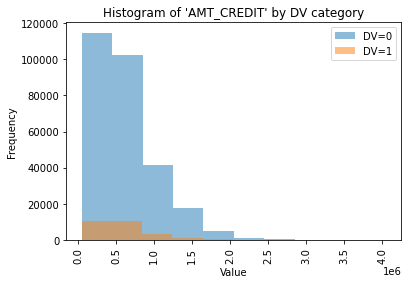

In [101]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

<AxesSubplot:>

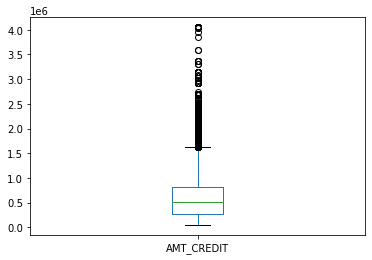

In [102]:
application_train_df[variable].plot.box()

In [103]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(40995.0, 312000.0]",92954,7028,0.075607
"(312000.0, 579000.0]",84922,8476,0.099809
"(579000.0, 846000.0]",59962,5065,0.084470
"(846000.0, 1113000.0]",33596,2349,0.069919
"(1113000.0, 1380000.0]",22708,1300,0.057249
"(1380000.0, 1647000.0]",7077,345,0.048749
"(1647000.0, 1914000.0]",3521,153,0.043454
"(1914000.0, 2181000.0]",1687,80,0.047421
"(2181000.0, 2448000.0]",669,14,0.020927


2:80: E501 line too long (82 > 79 characters)


Findings:
- No missing data
- Customers with a smaller loan appear to be more likely to default
- Outliers need to be dealt with

**Feature:   AMT_ANNUITY**

In [104]:
variable = 'AMT_ANNUITY'

In [105]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.003902299429939092

C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


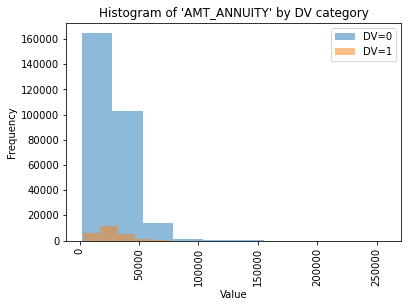

In [106]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

<AxesSubplot:>

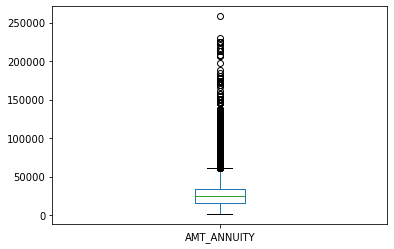

In [107]:
application_train_df[variable].plot.box()

In [108]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(1359.09, 18709.5]",95888,7230,0.075400
"(18709.5, 35803.5]",140843,12674,0.089987
"(35803.5, 52897.5]",54677,4026,0.073632
"(52897.5, 69991.5]",13010,777,0.059723
"(69991.5, 87085.5]",1979,91,0.045983
"(87085.5, 104179.5]",678,20,0.029499
"(104179.5, 121273.5]",236,4,0.016949
"(121273.5, 138367.5]",107,2,0.018692
"(138367.5, 155461.5]",20,1,0.050000


2:80: E501 line too long (82 > 79 characters)


Findings:
- Small percentage of missing data (0.004)
- Customers with a smaller loan appear to be more likely to default
- Outliers need to be dealt with

**Feature:   AMT_GOODS_PRICE**

In [161]:
variable = 'AMT_GOODS_PRICE'

In [162]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.09040327012692229

C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


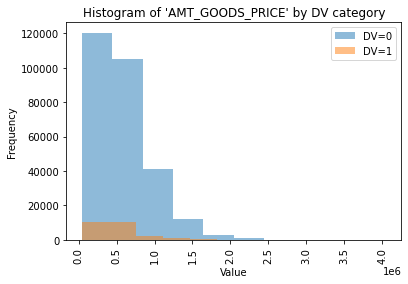

In [163]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

<AxesSubplot:title={'center':'AMT_GOODS_PRICE'}, xlabel='TARGET'>

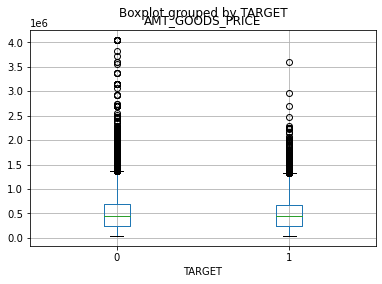

In [164]:
application_train_df.boxplot(column=variable, by='TARGET')

In [165]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(36490.5, 307800.0]",105297,8432,0.080078
"(307800.0, 575100.0]",86485,8730,0.100942
"(575100.0, 842400.0]",55191,4214,0.076353
"(842400.0, 1109700.0]",29950,1947,0.065008
"(1109700.0, 1377000.0]",22401,1162,0.051873
"(1377000.0, 1644300.0]",3736,159,0.042559
"(1644300.0, 1911600.0]",2889,119,0.041191
"(1911600.0, 2178900.0]",373,19,0.050938
"(2178900.0, 2446200.0]",846,18,0.021277


2:80: E501 line too long (82 > 79 characters)


In [166]:
application_train_df[[variable, 'TARGET']].corr()

,AMT_GOODS_PRICE,TARGET
AMT_GOODS_PRICE,1.000000,-0.039645
TARGET,-0.039645,1.000000


Findings:
- Small percentage of missing data (0.09)
- The negative correlation shows that customers with a lower AMT goods price appear to be more likely to default. This makes sense, because customer 
- Outliers need to be dealt with in the data cleaning process

**Feature:   REGION_POPULATION_RELATIVE**

In [167]:
variable = 'REGION_POPULATION_RELATIVE'

In [168]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

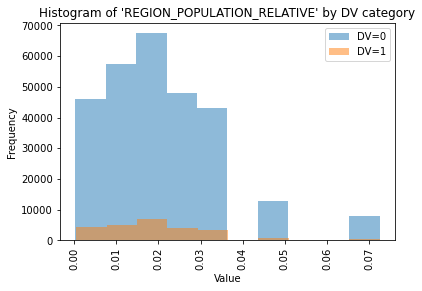

In [169]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

<AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}, xlabel='TARGET'>

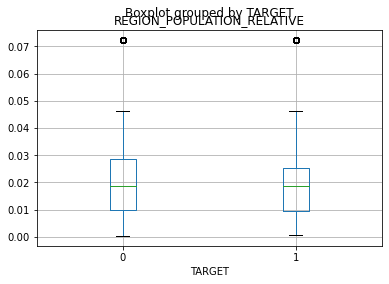

In [170]:
application_train_df.boxplot(column=variable, by='TARGET')

In [119]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(0.000218, 0.0051]",18239,1662,0.091123
"(0.0051, 0.00992]",56322,4858,0.086254
"(0.00992, 0.0147]",38331,3004,0.078370
"(0.0147, 0.0195]",52959,4722,0.089163
"(0.0195, 0.0244]",32166,3101,0.096406
"(0.0244, 0.0292]",41112,3157,0.076790
"(0.0292, 0.034]",30120,2174,0.072178
"(0.034, 0.0388]",16408,1150,0.070088
"(0.0388, 0.0436]",0,0,NaN


2:80: E501 line too long (82 > 79 characters)


Findings:
- No missing data
- Minimal outliers

**Feature:   DAYS_REGISTRATION**

In [120]:
variable = 'DAYS_REGISTRATION'

In [121]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0

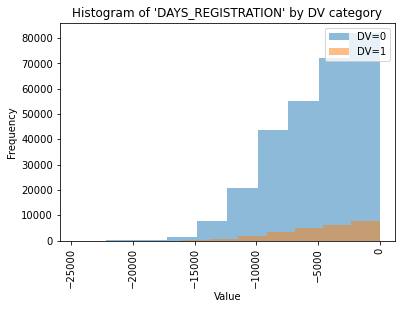

In [122]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

<AxesSubplot:title={'center':'DAYS_REGISTRATION'}, xlabel='TARGET'>

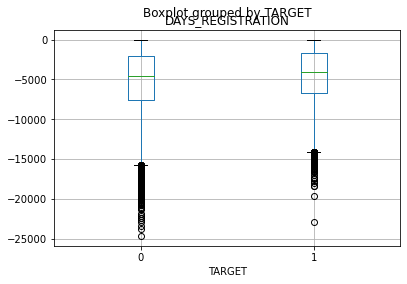

In [123]:
application_train_df.boxplot(column=variable, by='TARGET')

In [124]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(-24696.672, -23027.2]",3,0,0.000000
"(-23027.2, -21382.4]",8,1,0.125000
"(-21382.4, -19737.6]",21,0,0.000000
"(-19737.6, -18092.8]",59,3,0.050847
"(-18092.8, -16448.0]",233,10,0.042918
"(-16448.0, -14803.2]",1129,47,0.041630
"(-14803.2, -13158.4]",3985,196,0.049184
"(-13158.4, -11513.6]",9282,547,0.058931
"(-11513.6, -9868.8]",17012,974,0.057254


2:80: E501 line too long (82 > 79 characters)


Findings:
- No missing data
- Customers with a smaller AMT goods price appear to be more likely to default
- Outliers need to be dealt with. Because of negative values, needs to be transformed to postive to be able to apply IQR outlier removal

**Feature:   CNT_FAM_MEMBERS**

In [171]:
variable = 'CNT_FAM_MEMBERS'

In [172]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.0006503832383231819

C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


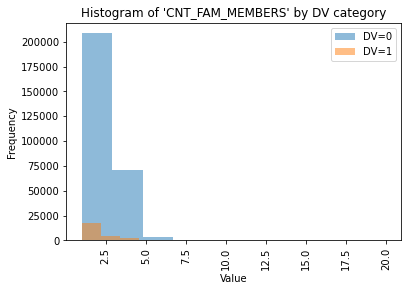

In [173]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

<AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}, xlabel='TARGET'>

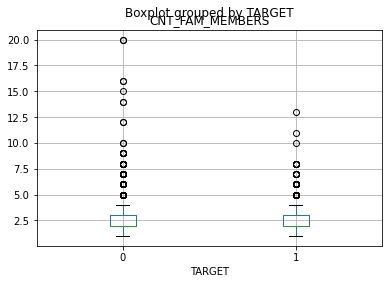

In [174]:
application_train_df.boxplot(column=variable, by='TARGET')

In [175]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(0.981, 2.267]",226204,17684,0.078177
"(2.267, 3.533]",52601,4608,0.087603
"(3.533, 4.8]",24697,2136,0.086488
"(4.8, 6.067]",3886,382,0.098302
"(6.067, 7.333]",81,6,0.074074
"(7.333, 8.6]",20,6,0.300000
"(8.6, 9.867]",6,0,0.000000
"(9.867, 11.133]",4,2,0.500000
"(11.133, 12.4]",2,0,0.000000


2:80: E501 line too long (82 > 79 characters)


Findings:
- Minimal missing data
- Large amount of outliers

**Feature:   DEF_30_CNT_SOCIAL_CIRCLE**

In [130]:
variable = 'DEF_30_CNT_SOCIAL_CIRCLE'

In [131]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.3320206431639844

C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


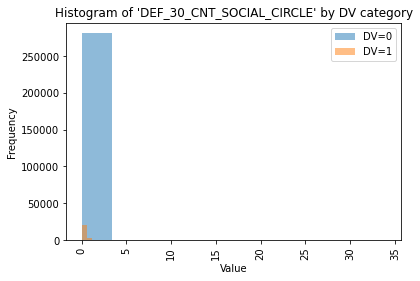

In [132]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

<AxesSubplot:title={'center':'DEF_30_CNT_SOCIAL_CIRCLE'}, xlabel='TARGET'>

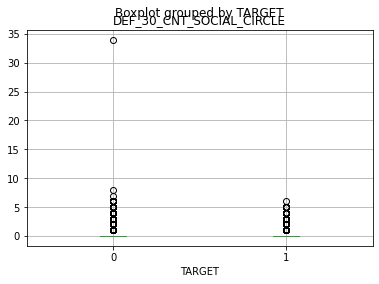

In [133]:
application_train_df.boxplot(column=variable, by='TARGET')

In [134]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(-0.034, 2.267]",304975,24592,0.080636
"(2.267, 4.533]",1445,188,0.130104
"(4.533, 6.8]",67,9,0.134328
"(6.8, 9.067]",2,0,0.000000
"(9.067, 11.333]",0,0,NaN
"(11.333, 13.6]",0,0,NaN
"(13.6, 15.867]",0,0,NaN
"(15.867, 18.133]",0,0,NaN
"(18.133, 20.4]",0,0,NaN


2:80: E501 line too long (82 > 79 characters)


In [135]:
# Calculate the % of customers with value 0
len(application_train_df[application_train_df[variable] == 0]) / len(application_train_df)

0.8823229087739951

Findings:
- Small amount of missing data (0.33%)
- 24% has one observations of social surroundings defaulted 30 days past due
- The majority of applicants (88%) didn't fall withing this category
 - Large amount of outliers due to skewed data
- customers with 2.267 or less observations of social surroundings defaulted 30 days past due are almost half as likely to have payment issues

**Feature:  OBS_60_CNT_SOCIAL_CIRCLE**

In [142]:
variable = 'OBS_60_CNT_SOCIAL_CIRCLE'

In [143]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.3320206431639844

C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


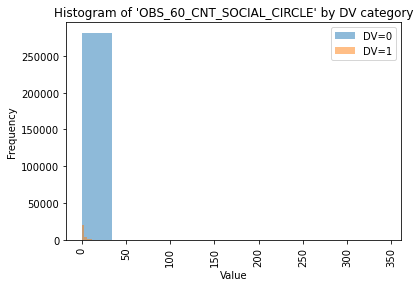

In [144]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

In [149]:
application_train_df[variable].value_counts(normalize=True)

0.0      0.537264
1.0      0.159451
2.0      0.097119
3.0      0.065956
4.0      0.045502
5.0      0.030875
6.0      0.020715
7.0      0.014173
8.0      0.009416
9.0      0.006392
10.0     0.004356
11.0     0.002731
12.0     0.002023
13.0     0.001308
14.0     0.000777
15.0     0.000542
16.0     0.000447
17.0     0.000238
18.0     0.000160
19.0     0.000144
20.0     0.000098
21.0     0.000091
22.0     0.000065
23.0     0.000042
24.0     0.000039
25.0     0.000036
27.0     0.000016
29.0     0.000007
28.0     0.000003
344.0    0.000003
47.0     0.000003
26.0     0.000003
30.0     0.000003
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:title={'center':'OBS_60_CNT_SOCIAL_CIRCLE'}, xlabel='TARGET'>

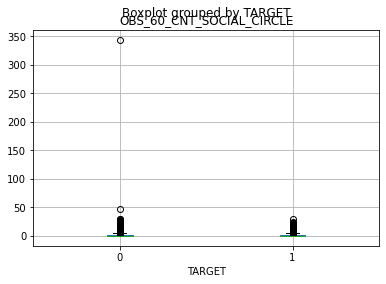

In [151]:
application_train_df.boxplot(column=variable, by='TARGET')

In [153]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(-0.344, 22.933]",306442,24785,0.080880
"(22.933, 45.867]",46,4,0.086957
"(45.867, 68.8]",1,0,0.000000
"(68.8, 91.733]",0,0,NaN
"(91.733, 114.667]",0,0,NaN
"(114.667, 137.6]",0,0,NaN
"(137.6, 160.533]",0,0,NaN
"(160.533, 183.467]",0,0,NaN
"(183.467, 206.4]",0,0,NaN


2:80: E501 line too long (82 > 79 characters)


Findings
- Small amount of missing data (0.33%)
- Around 53% of applicants doesn't fall within this category


**Feature:   DAYS_LAST_PHONE_CHANGE**

In [154]:
variable = 'AMT_GOODS_PRICE'

In [155]:
# Calculate the % of missing data
application_train_df[variable].isna().sum() / application_train_df[variable].isna().count() * 100

0.09040327012692229

C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


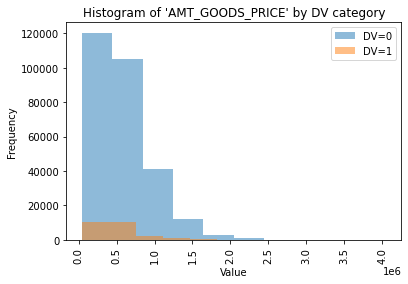

In [156]:
# Plot the distribution of contract types
plot_histogram_dv(application_train_df[variable],
                  application_train_df['TARGET'])

<AxesSubplot:title={'center':'AMT_GOODS_PRICE'}, xlabel='TARGET'>

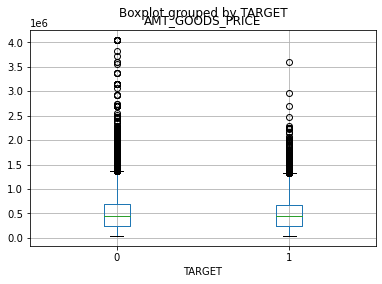

In [157]:
application_train_df.boxplot(column=variable, by='TARGET')

In [158]:
# Create feature bins to evaluate payment issues trend
application_train_df['binned'] = pd.cut(x=application_train_df[variable], bins=15)
application_train_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(36490.5, 307800.0]",105297,8432,0.080078
"(307800.0, 575100.0]",86485,8730,0.100942
"(575100.0, 842400.0]",55191,4214,0.076353
"(842400.0, 1109700.0]",29950,1947,0.065008
"(1109700.0, 1377000.0]",22401,1162,0.051873
"(1377000.0, 1644300.0]",3736,159,0.042559
"(1644300.0, 1911600.0]",2889,119,0.041191
"(1911600.0, 2178900.0]",373,19,0.050938
"(2178900.0, 2446200.0]",846,18,0.021277


2:80: E501 line too long (82 > 79 characters)


In [178]:
application_train_df[[variable, 'TARGET']].corr()

,CNT_FAM_MEMBERS,TARGET
CNT_FAM_MEMBERS,1.000000,0.009308
TARGET,0.009308,1.000000


Findings:
- 9% missing data
- Weak correlation with explanatory variable, inicating that this is unlikely a strong predictive feature

## Outlier removal

In [179]:
application_train_df.shape

(307511, 115)

### Continous features

In [180]:
test_df = application_train_df.copy()

<AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}, xlabel='TARGET'>

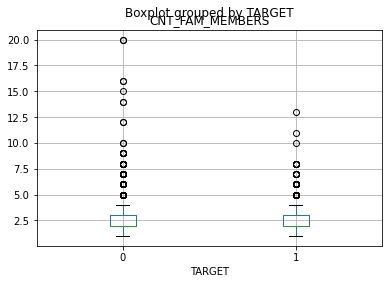

In [181]:
# Plot Credit amount request before outlier removal
test_df.boxplot(column=variable, by='TARGET')

In [182]:
test_df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [183]:
# Transform values DAYS_REGISTRATION from negative to positive in order to be able to apply IQR method
test_df['DAYS_REGISTRATION'] = test_df['DAYS_REGISTRATION'] * -1

1:80: E501 line too long (102 > 79 characters)


In [184]:
# Remove outliers in continous features using IQR
column_selection = list(test_df.select_dtypes(include=['float64']))

dataframe = test_df
rows_remove = []

for column in column_selection:
    IQR_sorted = sorted(dataframe[column])
    IQR = dataframe[column].median()
    Q1 = np.percentile(IQR_sorted, [25])
    Q3 = np.percentile(IQR_sorted, [75])
    lower_bound = (Q1 - (1.6 * IQR)).item()
    upper_bound = (Q3 + (1.6 * IQR)).item()
    rows = dataframe[(dataframe[column] < lower_bound) |
                     (dataframe[column] > upper_bound)].index.tolist()
    rows_remove = rows_remove + rows

print("Outliers dropped:", (len(rows_remove)/len(dataframe.index))*100, '%')

# Drop outlier customers from dataframe
test_df = dataframe.loc[~dataframe.index.isin(rows_remove)]

Outliers dropped: 7.214050879480734 %


<AxesSubplot:title={'center':'AMT_CREDIT'}, xlabel='TARGET'>

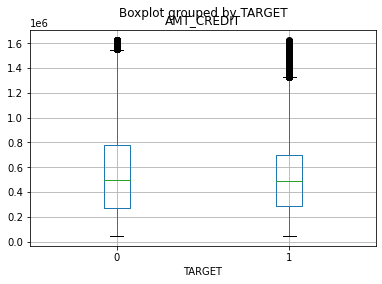

In [185]:
# Plot Credit amount request after outlier removal
test_df.boxplot(column='AMT_CREDIT', by='TARGET')

In [186]:
test_df['AMT_CREDIT'].describe()

count    2.878140e+05
mean     5.621675e+05
std      3.491464e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.975200e+05
75%      7.819200e+05
max      1.629418e+06
Name: AMT_CREDIT, dtype: float64

The before and after boxplots visualise the reduced spread of the variable, which helps to generalise the final ML model and make it applicable to a larger customer base. 

### Categorical features

Besides the continous features, the categorical features have a large spread of values. Reducing the spread will allow for better model performance.

In [187]:
test_df = application_train_df.copy()

In [188]:
# Create a count of unique values per categorical feature
cat_features = list(test_df.select_dtypes(include=['O']))
test_df[cat_features].nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_TYPE_SUITE                7
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_REALTY                2
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
dtype: int64

Based on the above list, it is clear that the feature 'ORGANIZATION_TYPE' requires some feature engineering to adjust the spread in the feature values.

In [190]:
test_df['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [191]:
# Count of unique values of column ORGANIZATION_TYPE
test_df['ORGANIZATION_TYPE'].nunique()

58

<AxesSubplot:>

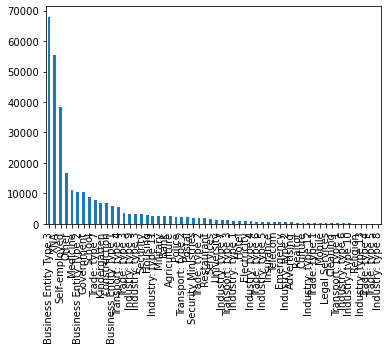

In [192]:
# Visualise the wide array of unique values before outlier removal
test_df['ORGANIZATION_TYPE'].value_counts().plot(kind='bar')

In [193]:
test_df['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

While reviewing the long list of values, some values overlap that can be used to group customers with similar values. For instance 'Business Entity Type 3' and 'Business Entity Type 2' can be grouped under the overarching group of 'Business'.

In [194]:
test_df['ORGANIZATION_TYPE_recode'] = test_df['ORGANIZATION_TYPE']

In [195]:
test_df = application_train_df.copy()

In [196]:
# Recode organisation subcategories into one main category (eg 'Trade: type 6 -> 'Trade)
dataframe = test_df
column = dataframe['ORGANIZATION_TYPE']
types = ['Trade', 'Industry', 'Transport', 'Business']

for item in types:
    column.loc[column.str.startswith(item, na=False)] = item

C:\Users\michiel.HEPSTAR\AppData\Local\Continuum\anaconda3a\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
1:80: E501 line too long (88 > 79 characters)


In [197]:
# select values with a low frequency and replace with "other"
dataframe = test_df
threshold = 0.01
column_selection = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE']

for col in dataframe[column_selection]:
    count = dataframe[col].value_counts(normalize=True)
    to_replace = count[count <= threshold].index.tolist()
    dataframe[col].replace(to_replace=to_replace, value="Other2", inplace=True)

4:80: E501 line too long (101 > 79 characters)


In [198]:
application_train_df['ORGANIZATION_TYPE'].nunique()

58

In [199]:
test_df['ORGANIZATION_TYPE'].nunique()

14

By applying this recode we've been able to regroup some of the customer organisation type and reduce the variability of the features values from 58 to 14. This should improve the model performance as more customers are allocated to a specific category instead of allocated the "other" category in the next step.

<AxesSubplot:>

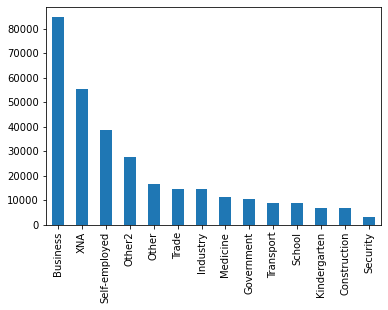

In [200]:
# Show unique values example feature after outlier removal
test_df['ORGANIZATION_TYPE'].value_counts().plot(kind='bar')

In [208]:
# Create a count of unique values per categorical feature
cat_features = list(test_df.select_dtypes(include=['O']))
test_df[cat_features].nunique().sort_values(ascending=False)

OCCUPATION_TYPE               18
ORGANIZATION_TYPE             14
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             6
NAME_EDUCATION_TYPE            5
NAME_INCOME_TYPE               5
NAME_TYPE_SUITE                5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_REALTY                2
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
dtype: int64

   ## Feature engineering

Key features according to the following research paper on mortgage default risk:
- loan-to-value = the ratio of a loan to the value of an asset purchased
- crises. The literature review says that its rare for a home owner to default their mortgage, but that its more likely during a crisis of some sort (e.g. recession). Having date of application would enable us to create a feature for this, which is a datapoint that usually is always included in a business setting

No strong correlations but worth evaluating:
- debt-to-income


https://poseidon01.ssrn.com/delivery.php?ID=093116088071089127066083066089099089001069066016061000078109018044108023027000114096034091044008086039047056107022028007073008035007001028117125006106116091031074074088027070123005104113001068097107004028017126066&EXT=pdf

### Feature loan % total income

In [202]:
variable = 'creditVSincome'

In [203]:
test_df[variable] = test_df['AMT_CREDIT'] / test_df['AMT_INCOME_TOTAL']

<AxesSubplot:title={'center':'creditVSincome'}, xlabel='TARGET'>

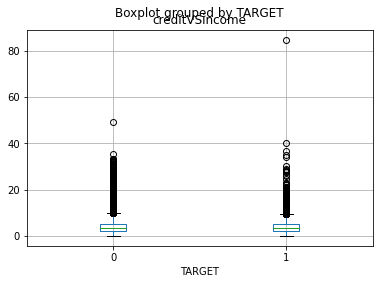

In [204]:
test_df.boxplot(column=variable, by='TARGET')

In [205]:
# Create key stats of the new variable, distinguishing between explanatory variable
test_df[test_df['TARGET'] == 1][variable].describe()

count    24825.000000
mean         3.887438
std          2.627348
min          0.004808
25%          2.130435
50%          3.253143
75%          4.991667
max         84.736842
Name: creditVSincome, dtype: float64

1:80: E501 line too long (83 > 79 characters)


In [206]:
# Create key stats of the new variable, distinguishing between explanatory variable
test_df[test_df['TARGET'] == 0][variable].describe()

count    282686.000000
mean          3.963729
std           2.695055
min           0.037500
25%           2.000333
50%           3.266653
75%           5.191333
max          49.227200
Name: creditVSincome, dtype: float64

1:80: E501 line too long (83 > 79 characters)


In [209]:
# Create feature bins to evaluate payment issues trend
test_df['binned'] = pd.cut(x=test_df[variable], bins=20)
test_df[['binned', 'SUM', 'TARGET']].groupby('binned').sum().eval('Payment_issues_rate = TARGET / SUM')

,SUM,TARGET,Payment_issues_rate
binned,,,
"(-0.0799, 4.241]",198639,16531,0.083221
"(4.241, 8.478]",89013,6930,0.077854
"(8.478, 12.715]",16480,1134,0.068811
"(12.715, 16.951]",2714,179,0.065954
"(16.951, 21.188]",481,31,0.064449
"(21.188, 25.424]",123,7,0.056911
"(25.424, 29.661]",35,7,0.200000
"(29.661, 33.898]",19,1,0.052632
"(33.898, 38.134]",4,3,0.750000


In [210]:
# calculate the correlation of the new features with the explanatory variable
test_df[[variable, 'TARGET']].corr()

,creditVSincome,TARGET
creditVSincome,1.000000,-0.007727
TARGET,-0.007727,1.000000


Findings:
- Interestingly, the payment issue rate appears to increase when the loan amount as % of income increases. I would have expected otherwise. However, this correlation is weak.
- Based on the above visualisation, key stats and correlation, this new feature will unlikely be a strong feature when creating our model. I will create this feature as part of the data cleaning process for completion, but it will likely be removed during the feature selection process.

# Next

Now we have an understanding of the dataset, the next step is to clean the data in preparation of the model creation. See the Data Cleaning notebook for this.